<a href="https://colab.research.google.com/github/idanshabo/computational_learning/blob/main/PS0_PyTorch_basics_2024_Fall_ID_318632312.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch - the Basics!

Advanced Learning 2024

Lee Carlin

## For SUBMISSION:
~~~
STUDENT ID: 318632312
~~~
~~~
STUDENT GIT LINK: https://github.com/idanshabo/computational_learning/blob/main/PS0_PyTorch_basics_2024_Fall_ID_318632312.ipynb~~~
In Addition, don't forget to add your ID to the files:
`PS0_PyTorch_basics_2024_ID_[318632312].ipynb`  
`PS0_PyTorch_basics_2024_ID_[318632312].html`  

## 1. What is PyTorch?


PyTorch is a popular open-source library for machine learning, particularly well-suited for deep learning applications.    
Here's a breakdown of its key features:

    

*   **Deep Learning Framework:**  PyTorch provides tools and functionalities to  build and train complex neural networks.
*   **Pythonic Interface:**  Known for its Python-like syntax, PyTorch is considered user-friendly and easy to learn.
* **Flexibility:**  PyTorch offers both dynamic computational graphs (eager execution) and static graphs (graph mode) for model development.
* **Production Ready:**  PyTorch provides features like TorchScript to transition models from development to production seamlessly.
* **Scalability:**  PyTorch supports distributed training, enabling you to leverage multiple CPUs or GPUs to train models faster.
* **Rich Ecosystem:**  A growing ecosystem of libraries and tools built on PyTorch expands its capabilities for tasks like computer vision, natural language processing, and model interpretability.




    
    

    

    
    



We start by importing PyTorch's main objects:

In [2]:
import torch
from torch import nn

### PyTorch Main Modules

`torch.nn`:

In PyTorch, the `torch.nn` module provides the essential building blocks you need to construct and train neural networks. It offers a comprehensive collection of classes and functions that streamline the deep learning development process.  
  
*Key Components:*  

**Modules**:   
These are the fundamental units that perform specific operations on data. They can be combined to create complex neural network architectures. Common examples include:   

* Linear Layers (nn.Linear): Apply linear transformations (y = xA^T + b) for feeding data forward through the network.
* Convolutional Layers (nn.Conv2d): Perform convolutions, especially useful for processing image data.
* Activation Layers (nn.ReLU, nn.Sigmoid): Introduce non-linearity into the network, allowing it to learn complex patterns.
* Normalization Layers (nn.BatchNorm2d): Normalize inputs to layers for faster and more stable training.
* Recurrent Layers (nn.LSTM, nn.GRU): Handle sequential data like text or time series.
* Dropout Layers (nn.Dropout): Introduce randomness by randomly dropping out neurons during training to prevent overfitting.
* Many More: PyTorch offers a vast selection of modules catering to diverse neural network architectures.

**Containers**:   
These classes help you organize and structure your modules into hierarchical networks. They include:
* nn.Sequential: Stacks modules in a linear sequence, making it easy to define simple neural networks.
* nn.ModuleList: Holds other modules in a list, allowing for more flexible network structures.
* nn.ModuleDict: Manages sub-modules with dictionary-like access for complex topologies.

**Loss Functions:**   
Functions that measure the error between the network's predictions and the ground truth labels. These guide the training process by calculating the gradients used to update the network's weights. Common examples include:
* nn.CrossEntropyLoss: For multi-class classification problems.
* nn.MSELoss: For mean squared error calculations in regression tasks.



In [3]:
from torch.utils.data import DataLoader


`torch.utils.data.DataLoader`:

In PyTorch, `torch.utils.data.DataLoader` is a powerful tool that simplifies how you load and manage data for training your deep learning models. It acts as an iterator, efficiently providing batches of data during the training process.

Here's a breakdown of its key functionalities:

Data Management Abstraction:

    Decouples data loading logic from your model training code, promoting cleaner and more maintainable code.
    Handles complexities like batching, shuffling, and multi-processing data loading, freeing you from writing repetitive code.

Efficient Batching:

    Groups data samples (images, text, etc.) into batches of a specified size (batch_size). Batching improves computational efficiency by utilizing vectorized operations on GPUs.
    Provides an optional collate_fn argument that allows you to customize how samples within a batch are combined. This can be useful for tasks like padding sequences to have the same length.

In [4]:
torch.__version__

'2.5.0+cu121'

In our course we use PyTorch version >=2.2.1.   
`cu121` refers to CUDA 12.1, a software layer that gives direct access to the GPU's virtual instruction set and parallel computational elements for the execution of compute kernels.

## 2. Tensors

In PyTorch, tensors are the fundamental data structure. They are similar to NumPy arrays but with some key advantages for deep learning:

* **Multi-dimensional Arrays**: Like NumPy arrays, tensors can have multiple dimensions, making them suitable for representing data like images (2D), videos (3D), or sequences of text (1D).

* **Hardware Acceleration**: PyTorch tensors can be moved to and run on GPUs or other hardware accelerators, significantly speeding up computations compared to CPUs for deep learning tasks.

* **Automatic Differentiation**:  A core feature in deep learning, automatic differentiation allows PyTorch to calculate gradients efficiently, which is essential for training neural networks.  Regular NumPy arrays don't inherently support this.

* **Rich Functionality**: PyTorch offers a variety of operations specifically designed for tensors, making it convenient to manipulate and analyze data for deep learning models.

In essence, tensors in PyTorch act as the workhorses for your deep learning models. They store and process the data that gets fed into your network, undergoes computations, and ultimately leads to predictions or outputs.


**PyTorch tensor operations:**

PyTorch tensor operations are the fundamental building blocks for working with data in your deep learning models. These operations allow you to manipulate, analyze, and transform tensors in various ways. Here's a breakdown of some common categories:

1. Arithmetic Operations:

These operations perform element-wise calculations between tensors or a tensor and a scalar value. They include:

    Addition (+)
    Subtraction (-)
    Multiplication (*)
    Division (/)
    Exponentiation (**)

These operations can be used for simple calculations or combined to create more complex expressions.

2. Comparison Operations:

These operations compare elements between tensors or a tensor and a scalar value, resulting in a tensor of booleans (True or False) indicating the comparison outcome. Examples include:

    Equal (==)
    Not equal (!=)
    Greater than (>)
    Less than (<)
    Greater than or equal (>=)
    Less than or equal (<=)

Comparison operations are useful for filtering data or making decisions within your model.

3. Broadcasting:

A powerful feature in PyTorch, broadcasting allows operations between tensors of different shapes as long as they are compatible. For instance, you can add a scalar value to a tensor, or add a one-dimensional tensor to a two-dimensional tensor (as long as the dimensions match). PyTorch automatically expands the smaller tensor to match the larger one for element-wise operations.

4. In-place Operations:

Certain operations modify the original tensor they are applied to, denoted by a trailing underscore (_). Examples include:

    x.add_(y) (equivalent to x = x + y)
    x.sub_(y) (equivalent to x = x - y)
    x.mul_(y) (equivalent to x = x * y)

These operations can be memory-efficient when modifying existing tensors is desired.

5. Linear Algebra Operations:

PyTorch provides functions for common linear algebra operations on tensors, including:

    torch.matmul(a, b): Matrix multiplication between tensors a and b.
    torch.sum(input, dim=None): Sums the elements of a tensor along a specified dimension.
    torch.mean(input, dim=None): Computes the mean of the elements of a tensor along a specified dimension.

These operations are essential for various deep learning tasks like calculating activation outputs or loss functions.

6. Tensor Reshaping and Indexing:

PyTorch offers functionalities to manipulate the shape and access specific elements of tensors:

    x.view(new_shape): Reshapes the tensor x into a new shape while keeping the total number of elements the same.
    x[index]: Accesses specific elements or sub-tensors using indexing syntax (similar to NumPy).

Reshaping and indexing are crucial for preparing data for specific layers in your neural network architecture.

7. Element-wise Operations:

These operations apply a function to each element of a tensor independently. PyTorch provides a rich set of element-wise functions like:

    torch.relu(x): Applies the rectified linear unit (ReLU) activation function.
    torch.sigmoid(x): Applies the sigmoid activation function.
    torch.tanh(x): Applies the hyperbolic tangent (tanh) activation function.

Element-wise operations are fundamental for introducing non-linearity and transforming data in deep learning models.

8. Random Operations:

PyTorch offers functions for generating random tensors or modifying existing ones with randomness:

    torch.rand(shape): Generates a random tensor filled with uniformly distributed values between 0 and 1.
    torch.randn(shape): Generates a random tensor filled with values from a standard normal distribution.

These operations are useful for data augmentation techniques or initializing weights in your network.

By understanding and effectively using these PyTorch tensor operations, you can build and manipulate your deep learning models with greater flexibility and control.

Some examples:

In [5]:
lst_of_lsts = [[1, 2, 3, 4],[5, 6, 7, 8]]
tens = torch.tensor(lst_of_lsts)
print(f"tens: {tens}")
print(f"Shape of tensor: {tens.shape}")
print(f"Datatype of tensor: {tens.dtype}")
print(f"Device tensor is stored on: {tens.device}")


tens: tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
Shape of tensor: torch.Size([2, 4])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


In [6]:
shape = (2,2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[[0.4782, 0.4929, 0.9467],
         [0.2027, 0.0031, 0.5120]],

        [[0.6986, 0.0171, 0.0646],
         [0.1317, 0.2862, 0.9877]]]) 

Ones Tensor: 
 tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]]) 

Zeros Tensor: 
 tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


In [7]:
shpe = (100,3)
t1 = torch.rand(shpe)
t2 = torch.rand(shpe)
t3 = torch.rand(shpe)
t4=torch.cat([t1,t2,t3],dim=0)
print(f"t4.shape: {t4.shape}")
t5=torch.cat([t1,t2,t3],dim=1)
print(f"t5.shape: {t5.shape}")

t4.shape: torch.Size([300, 3])
t5.shape: torch.Size([100, 9])


In [8]:
X = torch.rand(100,100)
X_cent = X - X.mean(dim=1, keepdim=True)
covX = X_cent.T@X_cent
covX

tensor([[ 8.6093, -0.7522, -1.0679,  ...,  0.5262,  0.7913, -0.1990],
        [-0.7522,  7.8138, -0.3018,  ..., -0.3598, -1.8289,  0.3191],
        [-1.0679, -0.3018,  8.7363,  ..., -1.6764,  1.5098, -0.8853],
        ...,
        [ 0.5262, -0.3598, -1.6764,  ...,  8.3078,  0.2333,  0.9187],
        [ 0.7913, -1.8289,  1.5098,  ...,  0.2333,  8.1381, -0.5455],
        [-0.1990,  0.3191, -0.8853,  ...,  0.9187, -0.5455,  8.7940]])

## Data & Handling

### PyTorch Datasets

Deep networks are versatile tools that can be adapted to various data types by
leveraging appropriate pre-processing techniques and network architectures.
PyTorch, like other deep learning libraries, can handle a wide array of data:
  


* images
* audio
* text data
* tabluar (numerical, categorical, mixed)
* multimodal Data
* other



PyTorch also offers built-in vision specific datasets as part of the `torchvision.datasets` [module](https://pytorch.org/vision/stable/datasets.html):

In [9]:
from torchvision import datasets

In [10]:
dir(datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'Imagenette',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'MovingMNIST',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 

In [11]:
from torchvision.transforms import ToTensor
train_source = training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
train_source

100%|██████████| 26.4M/26.4M [00:01<00:00, 20.1MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 346kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.36MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.89MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [12]:
type(train_source)

torchvision.datasets.mnist.FashionMNIST

In [13]:
print(f"the shape of the data: {train_source.data.shape}")

the shape of the data: torch.Size([60000, 28, 28])


We can visualize the data using matplotlib:

In [14]:
import matplotlib.pyplot as plt

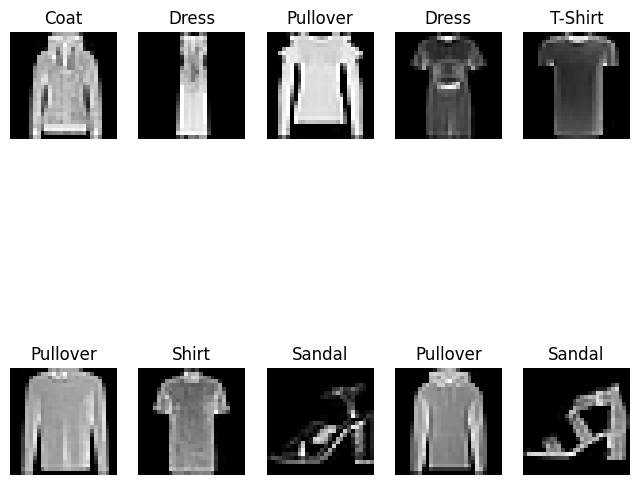

In [15]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_source), size=(1,)).item()
    img, label = train_source[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### DataLoader

As mentioned above, the `torch.utils.data.DataLoader` is responsible for handling data during the deep learning model training.

Key Parameters:

* dataset (Dataset): The PyTorch dataset you want to load data from (your custom class representing the data and how to access samples and labels).
* batch_size (int, optional): The number of samples in a batch (default: 1).
* shuffle (bool, optional): Whether to shuffle the data at the beginning of each epoch (default: False).
* sampler (Sampler, optional): A custom sampler object for controlling data loading order (default: None).
* collate_fn (callable, optional): A function to customize how samples within a batch are combined (default: None). Useful for padding sequences.
* pin_memory=True (bool, optional): If using a GPU, pin fetched data tensors in pinned memory for faster transfer (default: False).

In [16]:
train = DataLoader(train_source, batch_size=64, shuffle=True)
type(train)

torch.utils.data.dataloader.DataLoader



> The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.



In [17]:
for i in range(5):
  btch = next(iter(train))
  print(f"batch shape: {btch[0].shape}")

batch shape: torch.Size([64, 1, 28, 28])
batch shape: torch.Size([64, 1, 28, 28])
batch shape: torch.Size([64, 1, 28, 28])
batch shape: torch.Size([64, 1, 28, 28])
batch shape: torch.Size([64, 1, 28, 28])


## Practice Questions

Produce the following tensors:  

1. Create a tensor from the list `[1, 2, 3]`
2. Create a tensor from a NumPy array of shape (50,10)
3. Specify a data type and device option for a tensor with `[7, 8, 9]`, `[.5,0,.7]`
4. Create a zero tensor of size (3, 4)
5. Create a ones tensor of size (2, 2, 2) with dtype float
6. Create a tensor of size (5, 5) with random values from a normal distribution
7. Create a new tensor by cloning an existing tensor
8. Create a new tensor by reshaping an existing tensor
9. Create a new tensor by concatenating two existing tensors
10.  Perform operations with different data types

In [20]:
# YOUR CODE HERE
import numpy as np
list1 = [1,2,3]
tens_list1 = torch.tensor(list1)
print(f"1: {tens_list1}")

array1 = np.zeros((50, 10))
tens_array1 = torch.tensor(array1)
print(f"2: {tens_array1.shape}")

list2 = [[7, 8, 9], [.5,0,.7]]
tens_list2 = torch.tensor(list2)
print(f"3 data type: {tens_list2.dtype}")
print(f"3 device: {tens_list2.device}")

empty_tensor = torch.zeros((2,4))
print(f"4: {empty_tensor}")

ones_tensor = torch.ones((2,2,2), dtype=torch.float32)
print(f"5: {ones_tensor}")

rand_norm = torch.randn((5, 5))
print(f"6: {rand_norm}")

tensor_new = rand_norm.clone()
print(f"7: {tensor_new}")

tensor_reshaped = ones_tensor.view(2, 4)
print(f"8: {tensor_reshaped}")

concat_tensor = torch.cat([empty_tensor,tensor_reshaped],dim=1)
print(f"9: {concat_tensor}")

tensor_int = torch.tensor([[1, 2],[2,4],[1,3],[5,6]], dtype=torch.int32)

data_diff = tensor_reshaped.view(4,2) + tensor_int
print(f"10: {data_diff}")

1: tensor([1, 2, 3])
2: torch.Size([50, 10])
3 data type: torch.float32
3 device: cpu
4: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])
5: tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])
6: tensor([[ 0.9716,  1.9756, -1.3730,  0.0983,  0.8811],
        [ 1.3939,  0.2996,  1.0306,  0.3555,  0.6582],
        [ 2.2493,  0.6936, -1.3380,  0.2492, -1.0022],
        [-0.8577,  1.1954, -0.6421, -0.1647,  1.3338],
        [-0.9300,  0.4406,  0.1272, -0.9826, -1.5459]])
7: tensor([[ 0.9716,  1.9756, -1.3730,  0.0983,  0.8811],
        [ 1.3939,  0.2996,  1.0306,  0.3555,  0.6582],
        [ 2.2493,  0.6936, -1.3380,  0.2492, -1.0022],
        [-0.8577,  1.1954, -0.6421, -0.1647,  1.3338],
        [-0.9300,  0.4406,  0.1272, -0.9826, -1.5459]])
8: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
9: tensor([[0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1.]])
10: tensor([[2., 3.],
        [3., 5.],
        [2., 4.],
        [6., 7.

1. Inspect the  attributes of some of the tensors you created with `shape,dtype,numel`.
2. Indexing to access specific elements: `[[1, 2, 3], [4, 5, 6]]`, get the '2' element.

3. Modify modify the '5' element to '10'
4. Apply element-wise addition to two tensors.
5. Apply element-wise multiplication to two tensors
6. Apply a square root to a tensor.
7. Create a tensor with random values from a uniform distribution between 0 and 1.
8. Create a tensor with random values from a normal distribution with mean 0 and standard deviation 1
9. Create a tensor with random values from a discrete uniform distribution between 1 and 10.
10. Reshape a tensor from size `(2, 3)` to `(3, 2)`
11. Transpose a tensor
12. Concatenate tensors along a specific dimension
13. Stack tensors along a new dimension


In [22]:
# YOUR CODE HERE
print(f"1 shape: {tens_list1.shape}")
print(f"1 dtype: {tens_list1.dtype}")
print(f"1 numel: {empty_tensor.numel}")

tensor1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"2: {tensor1[0,1]}")

tensor1[1,1]=10
print(f"3: {tensor1}")

addition = tensor1 + tensor1
print(f"4: {addition}")

multiplication = tensor1 * tensor1
print(f"5: {multiplication}")

sqrt_tens = torch.sqrt(tensor1)
print(f"6: {sqrt_tens}")

rand_unif = torch.rand((2,2))
print(f"7: {rand_unif}")

rand_norm = torch.randn((2,2))
print(f"8: {rand_norm}")

rand_unif_disc = torch.randint(1, 11, (2, 2))
print(f"9: {rand_unif_disc}")

tensor_seq10 = torch.randn((2,3))
tensor_seq10_reshaped = tensor_seq10.view(3,2)
print(f"10 original: {tensor_seq10}")
print(f"10 reshaped: {tensor_seq10_reshaped}")

tensor_seq10_transposed = tensor_seq10.t()
print(f"11 original: {tensor_seq10}")
print(f"11 transposed: {tensor_seq10_transposed}")

Concat_tensors = torch.cat((rand_unif, rand_norm), dim=0)
print(f"12: {Concat_tensors}")

stacked_tensors = torch.stack((rand_unif, rand_norm), dim=0)
print(f"13: {stacked_tensors}")

1 shape: torch.Size([3])
1 dtype: torch.int64
1 numel: <built-in method numel of Tensor object at 0x7902013aa1b0>
2: 2
3: tensor([[ 1,  2,  3],
        [ 4, 10,  6]])
4: tensor([[ 2,  4,  6],
        [ 8, 20, 12]])
5: tensor([[  1,   4,   9],
        [ 16, 100,  36]])
6: tensor([[1.0000, 1.4142, 1.7321],
        [2.0000, 3.1623, 2.4495]])
7: tensor([[0.8152, 0.1408],
        [0.4869, 0.2377]])
8: tensor([[-1.5781, -0.9573],
        [-0.8186,  0.9996]])
9: tensor([[3, 2],
        [2, 4]])
10 original: tensor([[ 0.0202, -0.6537, -0.0401],
        [ 0.4053, -0.6604,  2.1344]])
10 reshaped: tensor([[ 0.0202, -0.6537],
        [-0.0401,  0.4053],
        [-0.6604,  2.1344]])
11 original: tensor([[ 0.0202, -0.6537, -0.0401],
        [ 0.4053, -0.6604,  2.1344]])
11 transposed: tensor([[ 0.0202,  0.4053],
        [-0.6537, -0.6604],
        [-0.0401,  2.1344]])
12: tensor([[ 0.8152,  0.1408],
        [ 0.4869,  0.2377],
        [-1.5781, -0.9573],
        [-0.8186,  0.9996]])
13: tensor([[[ 0

1. Sum of all elements in a tensor.
2. Mean along a specific dimension
3. Find the minimum and maximum values in a tensor
4. Find the indices of minimum and maximum values in a tensor


In [24]:
# YOUR CODE HERE
tensor_sum = torch.sum(tensor1)
print(f"1: {tensor_sum}")

tensor_float = tensor1.float()
tensor_mean = torch.mean(tensor_float, dim=0)
print(f"2: {tensor_mean}")

tensor_min = torch.min(tensor1)
print(f"3 Min: {tensor_min}")

tensor_max = torch.max(tensor1)
print(f"3 Max: {tensor_max}")

min_index = torch.argmin(tensor1)
print(f"4 Index of min: {min_index}")
max_index = torch.argmax(tensor1)
print(f"4 Index of max: {max_index}")

1: 26
2: tensor([2.5000, 6.0000, 4.5000])
3 Min: 1
3 Max: 10
4 Index of min: 0
4 Index of max: 4


Broadcasting:

In [25]:

# Broadcasting with scalars
tensor_a = torch.tensor([1, 2, 3])
scalar_b = 5
result_broadcast_scalar = tensor_a + scalar_b
print("Broadcasting with scalars:")
print(result_broadcast_scalar)  # Output: tensor([6, 7, 8])

# Broadcasting with different shapes
tensor_c = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor_d = torch.tensor([10, 20, 30])
result_broadcast_shape = tensor_c + tensor_d
print("Broadcasting with different shapes:")
print(result_broadcast_shape)

Broadcasting with scalars:
tensor([6, 7, 8])
Broadcasting with different shapes:
tensor([[11, 22, 33],
        [14, 25, 36]])


In [26]:
# Broadcasting with multidimensional tensors
tensor_a = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor_b = torch.tensor([10, 20, 30])
result_broadcast = tensor_a + tensor_b
print("Broadcasting with multidimensional tensors:")
print(result_broadcast)

# Common broadcasting pitfalls
tensor_c = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor_d = torch.tensor([10, 20])
# The following line will raise a RuntimeError
try:
    result_pitfall = tensor_c + tensor_d
except RuntimeError as e:
    print("RuntimeError:", e)

Broadcasting with multidimensional tensors:
tensor([[11, 22, 33],
        [14, 25, 36]])
RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1


Device specification

In [27]:
# Code examples for device configuration and availability

# Check if GPU is available
is_gpu_available = torch.cuda.is_available()
print("Is GPU available?", is_gpu_available)

# Specify device for tensor operations
device = torch.device('cuda' if is_gpu_available else 'cpu')
tensor_gpu = torch.tensor([1, 2, 3], device=device)
print("Tensor on GPU:", tensor_gpu)


Is GPU available? False
Tensor on GPU: tensor([1, 2, 3])


Dataloader practice:

Using the Fashion MNIST dataloader object, iterate over the batches, and calculate an interesting statistic. Make sure the statistic represent the entire data, not just a single batch. Hint- find a way to "update" the statistic along the batches.

In [29]:
# Your code here
from torchvision.transforms import ToTensor

train_dataset = data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

train_loader = DataLoader(train_dataset,
                         batch_size=64,
                         shuffle=True)

tot_sum = 0
tot_count = 0
for images, _ in train_loader:
    tot_sum += images.sum()
    tot_count += images.numel()

mean_pix_val = tot_sum / tot_count

print("Mean pixel value across the entire dataset:", mean_pix_val.item())

Mean pixel value across the entire dataset: 0.28604063391685486


## How to export an `HTML` file of your `ipynb`


1. Save your notebook and make sure all the cells have the expected output.
2. Download your notebook to your local machine.   `File-->Download-->Download ipynb`
3.  Reupload it so Colab can see it :  Click on the Files icon on the far left bar--> you should see your current kernel folder --> click `upload to session storage` --> upload your file.
4. Execute the following: `!jupyter nbconvert --to html /content/NOTEBOOKFILE.ipynb`
5. You should see the html file produced in your kernel's current folder. You can download it locally.
[link text](https://)

 END OF PyTorch BASICS